# Importing libraries

- It is also imported the py. file that contains the data MNIST

In [2]:
from load_mnist import load_mnist

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Matplotlib settings

In [4]:
# setting size for plotting with matplotlib
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    
plt.rc('axes', labelsize = 8)    # fontsize of the x and y labels
plt.rc('xtick', labelsize = 6)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 6)    # fontsize of the tick labels
plt.rc('legend', fontsize= 6)     # legend fontsize
plt.rc('figure', titlesize = 8)  # fontsize of the figure title

## The variable is a tuple containing the X and Y train and test inputs

In [5]:
data = load_mnist()

In [6]:
# assigning X, and Y
X_train = data[0]
Y_train = data[1]
X_test = data[2]
Y_test = data[3]

When adding more layers it is important that the elements in the weight matrices are `initialized` randomly. Initializing each element by sampling from $ N(0, \sigma^2) $. The offset vectors initialized with zeros.

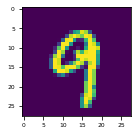

In [7]:
plt.figure(figsize=(2, 2))
plt.imshow(np.reshape(X_train[55555,:], [28,28]))

In [8]:
# X_train.shape[1] # 784 features 
# Y_train.shape[1] # M classes
def initialize_parameters(X_tr, Y_tr):
    global costs, accuracies, W, b, dw, db
    costs = []
    accuracies = []
   # accuracy = 0
    dw = 0
    db = 0
    y_t = 0
    W = np.random.normal(0, 0.01, size=(X_tr.shape[1], Y_tr.shape[1]))
    b = np.zeros((1, Y_train.shape[1]))
    return costs, accuracies, dw, db, y_t, W, b

## Softmax Operation

In [9]:
#z = X_train.dot(W) + b

In [10]:
def softmax(X_tr):
    global soft_max, W
    z = X_tr.dot(W) + b
    n = np.exp(z.T) # numerator (10,60000)
    d = np.sum(np.exp(z), axis=1) # denominator (60000,)
    soft_max = (n / d).T
    return soft_max

In [11]:
def cost_cal(soft_max,Y_tr):
    global costs
    cost = (-1 / Y_tr.shape[0]) * np.sum((Y_tr * np.log(soft_max)))
    costs.append(cost)
    return costs

In [12]:
def gradient(X_tr, Y_tr, soft_max, l_r):
    global W, b, dw, db
    n = Y_tr.shape[0]
    dw = (1 / n) * np.dot(X_tr.T, (soft_max - Y_tr))
    db = (1 / n) *  np.sum((soft_max - Y_tr),axis=0)
    W = W - l_r * dw
    b = b - l_r * db
    return W,b, dw, db

In [13]:
def accuracy_cal(soft_max, Y_tr):
    prediction = np.argmax(soft_max, axis=1)
    y_t = np.argmax(Y_tr,axis=1) # y_test is y_t
    accuracy = (prediction==y_t).mean()*100
    accuracies.append(accuracy)
    return accuracies

## Main Function "Logistic regression"

In [14]:
def regression_logi(x, y, learning_rate, num_iter):
    X_tr = x
    Y_tr = y
    l_r = learning_rate
    num_iter = num_iter
    
    initialize_parameters(X_tr,Y_tr)

    for i in range(num_iter):
        softmax(X_tr)
        accuracy_cal(soft_max, Y_tr)
        gradient(X_tr, Y_tr, soft_max, l_r)
        cost_cal(soft_max,Y_tr)
    return costs, accuracies

## Test, and train data 

In [15]:
train_data = regression_logi(X_train, Y_train, 0.6, 500)
test_data = regression_logi(X_test, Y_test, 0.6, 500)

In [16]:
train_costs = train_data[0]
train_accuracies = train_data[1]

test_costs = test_data[0]
test_accuracies = test_data[1]

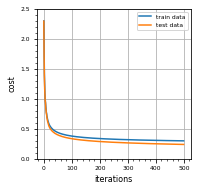

In [22]:
fig1 = plt.figure(figsize=cm2inch((7,7))) #10,8 for the report
ax = fig1.add_subplot()
ax.plot(range(len(train_costs)), train_costs, linestyle='solid', linewidth=1.5, label="train data")
ax.plot(range(len(test_costs)), test_costs, linestyle='solid', linewidth=1.5, label="test data")
ax.set_xlabel("iterations")
ax.set_ylabel("cost")
ax.grid(b=bool)
ax.minorticks_on()
ax.legend(loc="upper right")
ax.set_ylim(0, 2.5)
#plt.savefig('cost1.jpg',bbox_inches='tight', dpi=300)
plt.show()

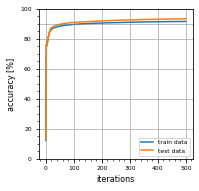

In [21]:
fig2 = plt.figure(figsize=cm2inch((7,7))) #10,8 for the report
ax = fig2.add_subplot()
ax.plot(range(len(train_accuracies)), train_accuracies, linestyle='solid', linewidth=1.5, label="train data")
ax.plot(range(len(test_accuracies)), test_accuracies, linestyle='solid', linewidth=1.5, label="test data")
ynew = 90
ax.axhline(ynew, color='gray', linewidth=0.5)
ax.set_xlabel("iterations")
ax.set_ylabel("accuracy [%]")
ax.grid(b=bool)
ax.minorticks_on()
ax.legend(loc="lower right")
ax.set_ylim(0,100)
#plt.savefig('acc1.jpg',bbox_inches='tight', dpi=300)
plt.show()

## l_r 0.6 and iteration 2000. accuracy 95%

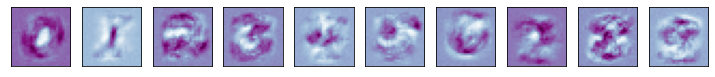

In [44]:
n = 10
plt.figure(figsize=(12.5, 10))
for i in range(n):
    ax = plt.subplot(1, 10, i+1)
    ax.imshow(W[:,i].reshape(28, 28), cmap="BuPu" )
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
   

#plt.savefig('w1.jpg',bbox_inches='tight', dpi=300)
plt.show()